# Linear Regression - Boston Housing Data Set

> Joseph P. Vantassel, The University of Texas at Austin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

## Load Data Set

In [2]:
((x_train, y_train), (x_test, y_test)) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=1824
)
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

In [3]:
print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"n_features = {len(features)}")

x_train.shape = (404, 13)
y_train.shape = (404,)
n_features = 13


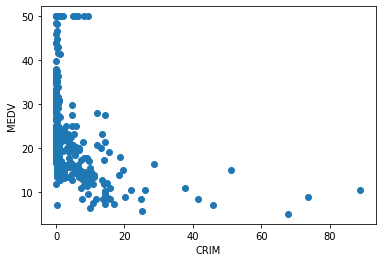

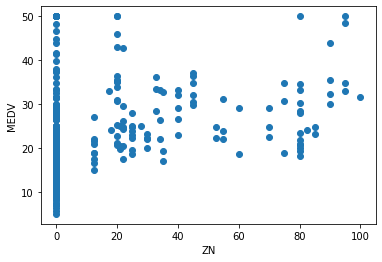

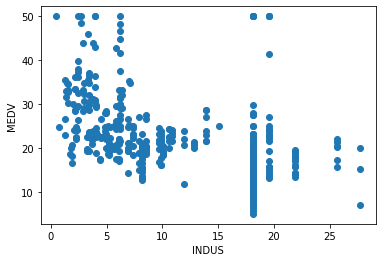

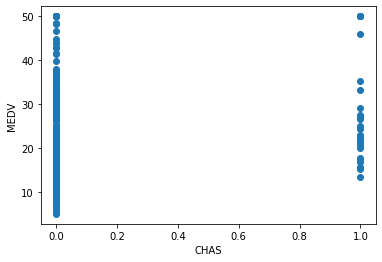

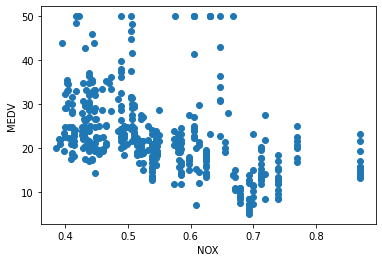

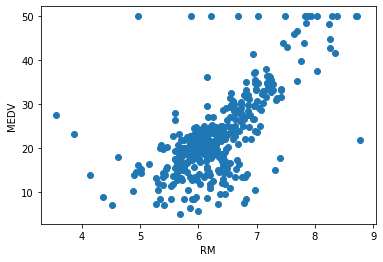

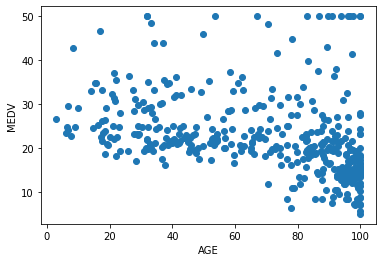

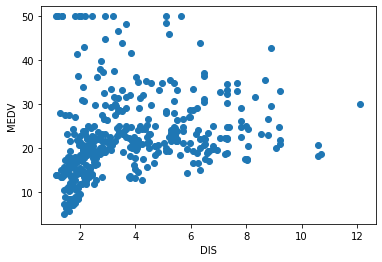

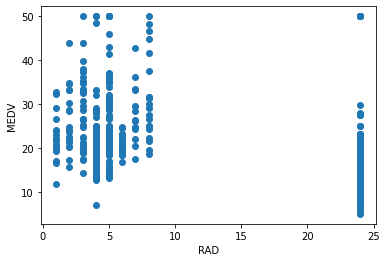

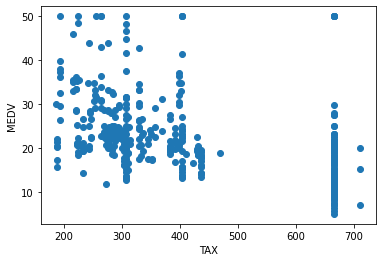

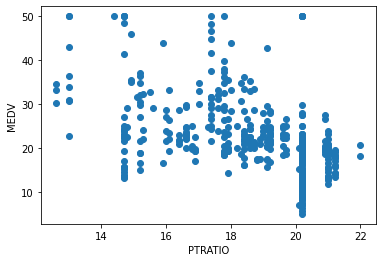

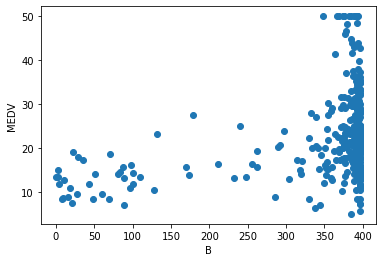

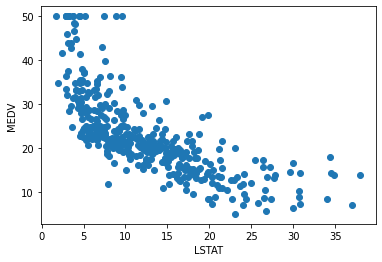

In [4]:
for feature, _x_train in zip(features, x_train.T):
    plt.plot(_x_train, y_train, marker="o", linestyle="")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.show()

## Model Definition

To start lets only look at a subset of the features provided.
The features `["INDUS", "NOX", "RM", "AGE", "LSTAT"]` look promising.

In [5]:
selected_features = ["INDUS", "NOX", "RM", "AGE", "LSTAT"]
selected_xtrain = x_train[:, [features.index(x) for x in selected_features]]

In [6]:
print(f"selected_nfeatures = {len(selected_features)}")
print(f"selected_xtrain.shape = {selected_xtrain.shape}")
print(f"y_train.shape = {y_train.shape}")

selected_nfeatures = 5
selected_xtrain.shape = (404, 5)
y_train.shape = (404,)


## Simple Linear Regression

Lets try a simple linear regression.
First we will split the training set into a training and validation set.
Then apply a simple linear regression using numpy.

In [7]:
train_valid_split = 0.8
train_samples = int(len(y_train)*0.8)
selected_xtrain_train = selected_xtrain[:train_samples, :]
ytrain_train = y_train[:train_samples]
selected_xtrain_val = selected_xtrain[train_samples:, :]
ytrain_val = y_train[train_samples:]

In [8]:
print(f"selected_xtrain_train.shape = {selected_xtrain_train.shape}")
print(f"selected_xtrain_val.shape = {selected_xtrain_val.shape}")

selected_xtrain_train.shape = (323, 5)
selected_xtrain_val.shape = (81, 5)


In [9]:
(thetas, _, _, _) = np.linalg.lstsq(selected_xtrain_train, ytrain_train, rcond=None)

In [10]:
print(f"thetas.shape = {thetas.shape}")

thetas.shape = (5,)


In [11]:
def calc_rms(y, y_hat):
    return np.sqrt(np.mean(np.power(y.flatten()-y_hat.flatten(), 2)))

rms (train) = 5.82


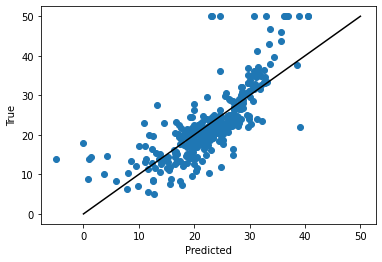

In [12]:
ytrain_pred = (selected_xtrain_train @ np.atleast_2d(thetas).T).flatten()
rms = calc_rms(ytrain_pred, ytrain_train)
print(f"rms (train) = {rms:.2f}")
plt.plot(ytrain_pred, ytrain_train, marker="o", linestyle="")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot([0,50], [0,50], linestyle="-", color="black")
plt.show()

rms (validation) = 4.87


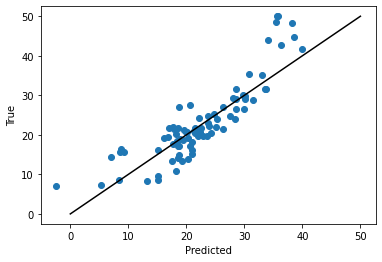

In [13]:
ytrain_pred = (selected_xtrain_val @ np.atleast_2d(thetas).T).flatten()
rms = calc_rms(ytrain_pred, ytrain_val)
print(f"rms (validation) = {rms:.2f}")
plt.plot(ytrain_pred, ytrain_val, marker="o", linestyle="")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot([0,50], [0,50], linestyle="-", color="black")
plt.show()

## Simple Multi-Layer Perceptron (MLP)

Try a simple MLP-based network. For this we use the Keras/Tensorflow API.
First we need to normalize the input data.

In [14]:
mean, std = np.mean(selected_xtrain_train, axis=0), np.std(selected_xtrain_train, axis=0)

selected_xtrain_train_norm = (selected_xtrain_train - mean)/std
selected_xtrain_val_norm = (selected_xtrain_val - mean)/std

Now we need to define our model

In [15]:
loss = tf.keras.losses.MeanSquaredError()

In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0003, momentum=0.9)

In [17]:
def make_model(nhidden=3, layer_size=10, activation="relu"):
    model = keras.Sequential()
    model.add(keras.Input(shape=len(selected_features)))
    for _ in range(nhidden):
        model.add(keras.layers.Dense(layer_size, activation=activation))
    model.add(keras.layers.Dense(1))
    return model

In [18]:
model = make_model(nhidden=3, layer_size=20, activation="relu")
model.compile(optimizer=optimizer, loss=loss)

2022-01-20 13:54:25.474061: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size = 64
epochs = 20

history = model.fit(selected_xtrain_train_norm, ytrain_train,
                    validation_data=(selected_xtrain_val_norm, ytrain_val),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/20
6/6 [==============================] - 0s 23ms/step - loss: 597.5939 - val_loss: 602.4751
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 539.4861 - val_loss: 504.7073
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 382.8580 - val_loss: 112.7018
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 188.1264 - val_loss: 57.9733
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 137.0322 - val_loss: 142.1019
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 93.6007 - val_loss: 132.5136
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 80.3856 - val_loss: 43.4665
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 53.6245 - val_loss: 39.6333
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 34.3175 - val_loss: 22.6069
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 27.4166 - val_loss: 20.6559
Epoch 11

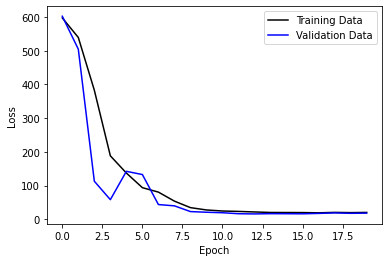

In [21]:
plt.plot(history.epoch, history.history["loss"], color="black", label="Training Data")
plt.plot(history.epoch, history.history["val_loss"], color="blue", label="Validation Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

rms (train) = 4.36


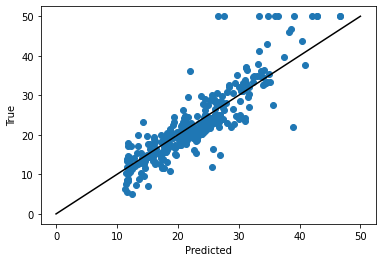

In [22]:
ytrain_pred = model.predict(selected_xtrain_train_norm).flatten()
rms = calc_rms(ytrain_pred, ytrain_train)
print(f"rms (train) = {rms:.2f}")
plt.plot(ytrain_pred, ytrain_train, marker="o", linestyle="")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot([0,50], [0,50], linestyle="-", color="black")
plt.show()

rms (val) = 4.25


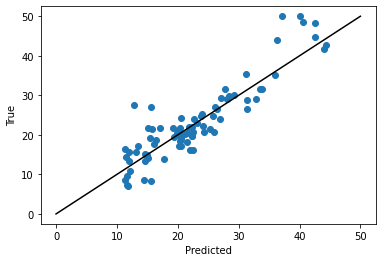

In [23]:
yval_pred = model.predict(selected_xtrain_val_norm).flatten()
rms = calc_rms(yval_pred, ytrain_val)
print(f"rms (val) = {rms:.2f}")
plt.plot(yval_pred, ytrain_val, marker="o", linestyle="")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot([0,50], [0,50], linestyle="-", color="black")
plt.show()